# Some Examples on Particle Swarm Optimization

### Import packages

In [2]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from codes.API.EM_Rasch_API import *

In [63]:
def Mixture_IRT_MMLE(particles, parameters):
    # unpack parameters
    Y, nodes_num = parameters
    N, I = Y.shape
    
    log_lik = np.zeros((particles.shape[0]))
    
    for i in range(particles.shape[0]):
        
        initial_value = particles[i] # (I+2)

        # set-up parameters to be updated (parameters is an (I+2) vector)
        betas = initial_value[:I]
        sigma = np.abs(initial_value[I])
        mu = initial_value[I+1]

        # Gaussian-Hermite nodes and weights
        nodes, weights = np.polynomial.hermite.hermgauss(nodes_num)
        weights /= np.sqrt(np.pi)
        nodes *= np.sqrt(2)

        ### Calculate marginal log-likelihood
    
        # Initialize marginals: Nx1 vector
        marginal = np.zeros(N)
        
        # Adjust nodes
        nodes = nodes + mu

        # Calculate marginals: Nx1 vector
        marginal = (f_y(Y, betas, sigma, nodes) * H(nodes, fct="one")).dot(weights)
        
        # Calculate sum of log-likelihood
        log_lik[i] = np.sum(np.log(marginal))
    
    return -log_lik

In [67]:
data = np.array(pd.read_excel(r'datasets/Verbal aggression/data verbal aggression matrix dichot.xls'))
Y = data[:, :24]

N, I = np.shape(Y)
G = 1
beta_init = 0.5 * np.ones((I, G)); sigma_init = 2 * np.ones((1, G))
pi_init = [1 / G] * G; mu_init = [0] * G
init_value = np.vstack((beta_init, sigma_init, mu_init))

In [68]:
bounds = [tuple(np.hstack((np.repeat(-np.inf, (I+2))))),
          tuple(np.hstack((np.repeat(np.inf, (I+2)))))]

In [69]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
n = 100
init_pos = np.repeat(init_value.reshape((-1,1)), n, axis=1).T
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=n, dimensions=(I+2), options=options, bounds=bounds, init_pos=init_pos)
# Perform optimization
best_cost, best_pos = optimizer.optimize(Mixture_IRT_MMLE, iters=300, parameters=(Y, 21))

2021-03-05 21:06:22,164 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   1%|          |2/300, best_cost=4.75e+3/Users/elviscui/Desktop/ParticleSwarmOptimization/codes/API/EM_Rasch_API.py:24: RuntimeWarning: overflow encountered in exp
  numerator = np.exp(to_exp)
/Users/elviscui/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/Users/elviscui/Desktop/ParticleSwarmOptimization/codes/API/EM_Rasch_API.py:30: RuntimeWarning: invalid value encountered in true_divide
  CLF = numerator / denomenator
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=4.04e+3
2021-03-05 21:06:35,693 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4037.40215239737, best pos: [-1.41312568 -0.75735198 -0.27286597 -1.94010208 -0.90022033 -0.20451347
 -0.72206498  0.4

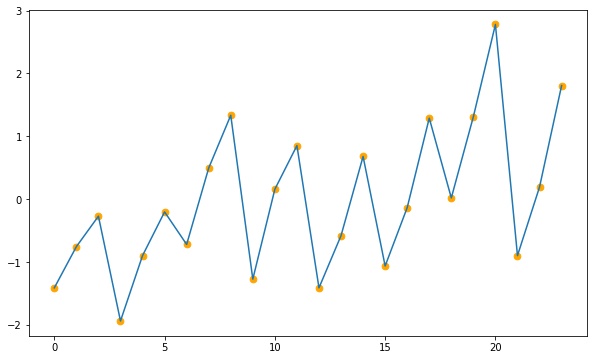

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(I), best_pos[:I])
plt.scatter(range(I), best_pos[:I], c="orange", s=45)